2020-05-19 16:17:30 
Run used the latest modified code - repo BayesActiveLearning_V2 branch - > Ashish

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import os

BAL - stands for bayesian accelerated learning

In [4]:
plot_pth = 'BayesianOneShotVsBayesianVariationRatio/'
class getMetric:

    def __init__(self, typ, pth, truncate_end, truncate_st, n_classes):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if typ == 'accuracy' and n_classes == 10:
            indx = 10
        if typ == 'accuracy' and n_classes == 100:
            indx = 100
        # classification error
        if truncate_end == None:
            self.metric = [pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]
        else:
            if not truncate_st: truncate_st = 0
            self.metric = [pd.read_csv(pth + f).iloc[indx][1] for f in self.files][truncate_st:truncate_end]

def PlotGraph(figure_nam,data_locs,labels,truncate_end=None,truncate_st=None, x_l=None,y_l=None,
              n_classes=10,isample=100, mini_window=False):
    metric_list = [getMetric('accuracy',pth,truncate_end, truncate_st, n_classes).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    if mini_window:
        mini_window_metric = [getMetric('accuracy',pth, 15, truncate_st, n_classes).metric for pth in data_locs]
        rounds_mini_window = range(len(mini_window_metric[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C','#2C3E50', '#3498DB']
    model_names = {'b_names':{'BBB':['BBB-VR','BBB-E','BBB-RS'],'Jeffrey':['BCN-VR', 'BCN-E'], 'BOAL':['BAL']}}
    # create specific colors and markers
    markers, line_style = [], []
    for l in labels:
        if l in model_names['b_names']['BBB']:
            markers.append('^')
            line_style.append('--')
        elif l in model_names['b_names']['BOAL']:
            markers.append('|')
            line_style.append('-')
        elif l in model_names['b_names']['Jeffrey']:
            markers.append('X')
            line_style.append('--')
        else:
            markers.append('o')
            line_style.append('-')

    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    fig = plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    if mini_window:
        axins = ax.inset_axes([0.3, 0.1, 0.45, 0.4])
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], linestyle=line_style[i], color=colors[i], label=labels[i])
        if mini_window:
            axins.plot(rounds_mini_window, mini_window_metric[i], marker=markers[i], linestyle=line_style[i], color=colors[i], label=labels[i])
    if x_l:
        ax.set_xlim(x_l)
    if y_l:
        ax.set_ylim(y_l)

    ax.set_ylabel('Classification Accuracy', fontsize=18)
    ax.set_xlabel(r'# Samples ($\times ' + str(isample) + '$)', fontsize=18)
    ax.legend(loc=4, ncol=1, frameon=True)
    if mini_window: ax.indicate_inset_zoom(axins)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

<h4 align="center">MNIST</h4>


In [34]:
# Using SINR as uncertainty measure
pth_1 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_2 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
pth_3 = '../results/Blenet300-100_mnist_isample1000_e15_r41_ac1_b100_Klreg-standard2_retrain0_m/'
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r51_ac0_b100_Klreg-standard2_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BAL-VR','BAL-E','BOAL','BRS']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

FileNotFoundError: [Errno 2] No such file or directory: '../results/Blenet300-100_mnist_isample1000_e15_r41_ac1_b100_Klreg-standard2_retrain0_m/'

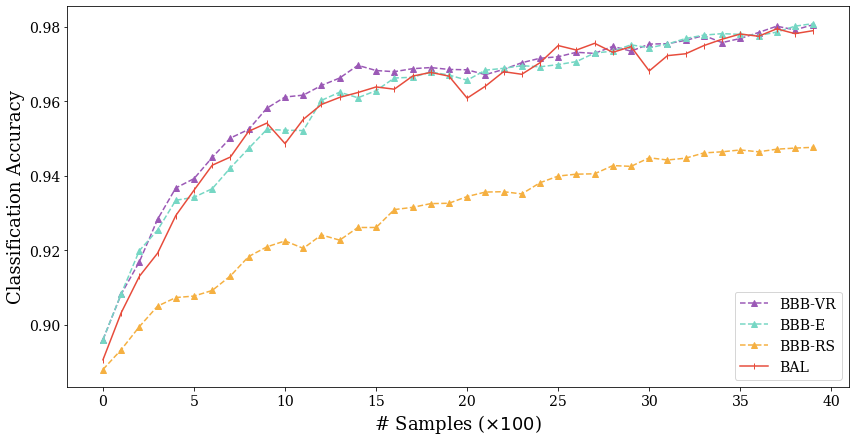

In [9]:
# Using variation-ratio
pth_1 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_2 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
pth_3 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r51_ac0_b100_Klreg-standard2_retrain0/'
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r41_ac1_b100_Klreg-standard2_retrain0_variation_ratio/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BBB-VR','BBB-E','BBB-RS','BAL']
f_name = 'oneshot_a'
PlotGraph(f_name,locs,labels, isample=100)

Note: the following code was run using blundell kls, retraining after 10 epoch and by not calling optimizer at each epoch. There is some problem with the bayesian layer for OneShot since the optimizer behaves weirdly.Need to implement this on a better BBB version

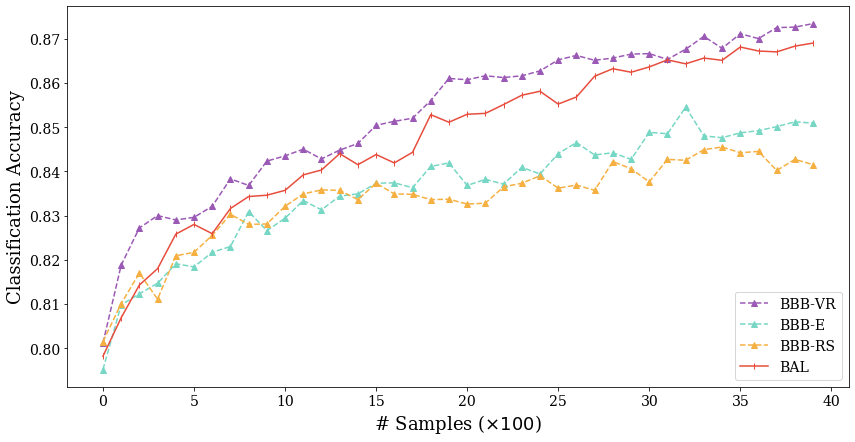

In [11]:
# 1000 initial samples
pth_1 = '../results_archive/Blenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/Blenet300-100_fmnist_isample1000_e50_r41_ac0_Klreg-standard1_b100_topK-100_mcmc5_netType-blundelloptim-Adamvariation-ratio_rtAfter100/'
pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r41_ac1_b100_Klreg-blundell_retrain0_OneShot/'
# bayesian results
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BBB-VR','BBB-E','BBB-RS','BAL']
f_name = 'oneshot_b'
PlotGraph(f_name,locs,labels,isample=100)